<a href="https://colab.research.google.com/github/Pataweepr/applyML_vistec_2019/blob/master/hw5_gene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_f1, label)
y_pred = model.predict(x_f1)
print("Model Acc. on train data %f%%"
       % ((label == y_pred).sum() / x_f1.shape[0] * 100))
'''


'\nfrom sklearn.naive_bayes import MultinomialNB\nmodel = MultinomialNB()\nmodel.fit(x_f1, label)\ny_pred = model.predict(x_f1)\nprint("Model Acc. on train data %f%%"\n       % ((label == y_pred).sum() / x_f1.shape[0] * 100))\n'

# [link naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [0]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [3]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#'1xKLYVIXVq0lXb9Ys_l3c5_v9S_kcv-xQ'
file_list = drive.ListFile({'q': "'1xKLYVIXVq0lXb9Ys_l3c5_v9S_kcv-xQ' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: code_and_pred.6872.1506176059.2623.zip, id: 1kA35oyisCxldVeeWxkAU7zjwy4rmQ1kU
title: hw2_2.6872.1506176611.9498.pdf, id: 1KJwdU3Lgxe5Z2GfcI95DNp48F8Gl19Ch
title: HW2_Housekeeping_Genes.final.pdf, id: 1GicvF61oLpx547LT_tM4FHX-C6DDQoMI
title: 12864_2006_660_MOESM1_ESM.csv, id: 1v7vyl4lTiMJA1eDjrC9w7tEZxzYBoK59
title: gene.ipynb, id: 13KZylyFQKi-grQtLWZSP7T8TK9_pWW53
title: out.csv, id: 1rSZQ24R9gWqlH1UrLm1zHbKMtQwdxPAP


In [4]:
data_downloaded = drive.CreateFile({'id': '1v7vyl4lTiMJA1eDjrC9w7tEZxzYBoK59'})
data_downloaded.GetContentFile('hkg.csv')
data_all = pd.read_csv('hkg.csv')
data_all.head()

,EMBL_transcript_id,cDNA_length,cds_length,exons_nr,5_MAR_presence,3_MAR_presence,5_polyA_18_presence,5_CCGNN_2_5_presence,perc_go_hk_match,perc_go_ts_match,is_hk
0,ENST00000274311,2918.0,1158.0,3.0,no,no,no,yes,0.1,0.200000,NaN
1,ENST00000282588,4795.0,3540.0,29.0,no,no,no,yes,0.1,0.200000,NaN
2,ENST00000274311,2918.0,1158.0,3.0,no,no,no,yes,0.1,0.200000,NaN
3,ENST00000282588,4795.0,3540.0,29.0,no,no,no,yes,0.1,0.200000,NaN
4,ENST00000337416,4551.0,1656.0,18.0,no,yes,no,no,0.0,0.111111,NaN


In [5]:
data_all.describe()

,cDNA_length,cds_length,exons_nr,perc_go_hk_match,perc_go_ts_match
count,35164.000000,35164.000000,20568.000000,25957.000000,25957.000000
mean,2439.950432,1484.058583,6.568748,0.036278,0.222914
std,2012.944961,1502.566846,8.333126,0.131669,0.253348
min,45.000000,45.000000,1.000000,0.000000,0.000000
25%,1168.000000,642.000000,1.000000,0.000000,0.000000
50%,2047.000000,1119.000000,3.000000,0.000000,0.166667
75%,3185.250000,1821.000000,9.000000,0.000000,0.363636
max,99631.000000,98385.000000,118.000000,1.000000,1.000000


In [0]:
data_all.loc[data_all["5_MAR_presence"] == "no", "5_MAR_presence"] = 0.0
data_all.loc[data_all["5_MAR_presence"] == "yes", "5_MAR_presence"] = 1.0
data_all.loc[data_all["3_MAR_presence"] == "no", "3_MAR_presence"] = 0.0
data_all.loc[data_all["3_MAR_presence"] == "yes", "3_MAR_presence"] = 1.0
data_all.loc[data_all["5_polyA_18_presence"] == "no", "5_polyA_18_presence"] = 0.0
data_all.loc[data_all["5_polyA_18_presence"] == "yes", "5_polyA_18_presence"] = 1.0
data_all.loc[data_all["5_CCGNN_2_5_presence"] == "no", "5_CCGNN_2_5_presence"] = 0.0
data_all.loc[data_all["5_CCGNN_2_5_presence"] == "yes", "5_CCGNN_2_5_presence"] = 1.0
data_all.loc[data_all["is_hk"] == "no", "is_hk"] = 0.0
data_all.loc[data_all["is_hk"] == "yes", "is_hk"] = 1.0
del data_all["EMBL_transcript_id"]

In [7]:
data_all.head()

,cDNA_length,cds_length,exons_nr,5_MAR_presence,3_MAR_presence,5_polyA_18_presence,5_CCGNN_2_5_presence,perc_go_hk_match,perc_go_ts_match,is_hk
0,2918.0,1158.0,3.0,0,0,0,1,0.1,0.200000,NaN
1,4795.0,3540.0,29.0,0,0,0,1,0.1,0.200000,NaN
2,2918.0,1158.0,3.0,0,0,0,1,0.1,0.200000,NaN
3,4795.0,3540.0,29.0,0,0,0,1,0.1,0.200000,NaN
4,4551.0,1656.0,18.0,0,1,0,0,0.0,0.111111,NaN


In [8]:
print(data_all.count())
data_all['is_hk'].isnull().sum()

cDNA_length             35164
cds_length              35164
exons_nr                20568
5_MAR_presence          47229
3_MAR_presence          47229
5_polyA_18_presence     47229
5_CCGNN_2_5_presence    47229
perc_go_hk_match        25957
perc_go_ts_match        25957
is_hk                     770
dtype: int64


46459

In [9]:
(data_all['is_hk']==1.0).sum()

103

In [10]:
known_labels = data_all[data_all['is_hk'].notnull()]
known_labels.count()

cDNA_length             770
cds_length              770
exons_nr                209
5_MAR_presence          770
3_MAR_presence          770
5_polyA_18_presence     770
5_CCGNN_2_5_presence    770
perc_go_hk_match        760
perc_go_ts_match        760
is_hk                   770
dtype: int64

In [0]:
# Train test split
test_0 = data_all[data_all['is_hk']==0].sample(frac=0.1, random_state=200)
test_1 = data_all[data_all['is_hk']==1].sample(frac=0.1, random_state=200)
test_set = pd.concat([test_0, test_1])
train_set = data_all.drop(test_set.index)
sup_train_set = train_set[train_set.is_hk.notnull()]
unsup_train_set = train_set.drop(sup_train_set.index)

In [12]:
sup_train_set.count()

cDNA_length             693
cds_length              693
exons_nr                193
5_MAR_presence          693
3_MAR_presence          693
5_polyA_18_presence     693
5_CCGNN_2_5_presence    693
perc_go_hk_match        683
perc_go_ts_match        683
is_hk                   693
dtype: int64

In [13]:
sup_train_set['is_hk'].value_counts()

0.0    600
1.0     93
Name: is_hk, dtype: int64

In [0]:
#print(len(bin_edge.repeat(2)[1:-1]))
#print(len(hist.repeat(2)))

## หาจุดตัด

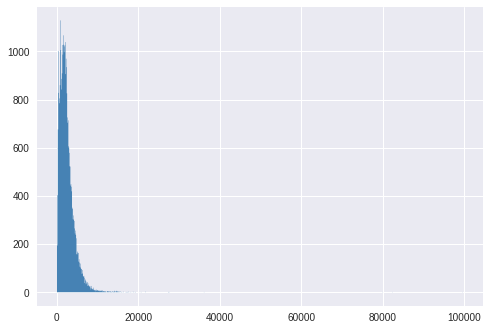

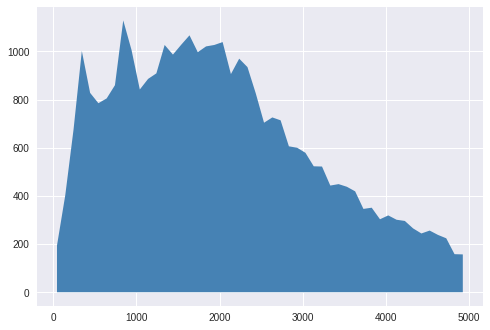

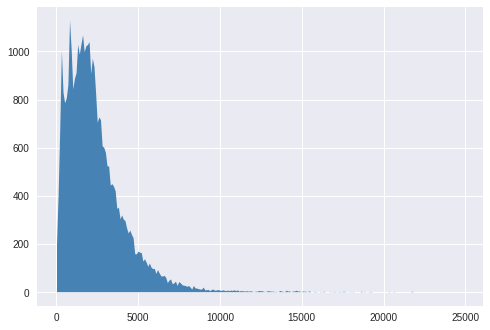

In [15]:
train_set_clength = data_all['cDNA_length']
# remove NaN values
train_set_clength_no_nan = train_set_clength[~np.isnan(train_set_clength)]
# bin the data into 1000 equally spaced bins
# hist is the count for each bin
# bin_edge is the edge values of the bins
hist, bin_edge = np.histogram(train_set_clength_no_nan,1000)
# make sure to import matplotlib.pyplot as plt
# plot the histogram
plt.fill_between(bin_edge.repeat(2)[1:-1],hist.repeat(2),facecolor='steelblue')
plt.show()
# plot the first 100 bins only
plt.fill_between(bin_edge.repeat(2)[1:100],hist.repeat(2)[1:100],facecolor='steelblue')
plt.show()
# plot the first 500 bins only
plt.fill_between(bin_edge.repeat(2)[1:500],hist.repeat(2)[1:500],facecolor='steelblue')
plt.show()

In [16]:
print(bin_edge)

[4.5000000e+01 1.4458600e+02 2.4417200e+02 ... 9.9431828e+04 9.9531414e+04
 9.9631000e+04]


In [17]:
print((hist==0).sum())

823


[pd.sort_values()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

[np.unique](https://docs.scipy.org/doc/numpy/reference/generated/numpy.unique.html)

[link np.digitize](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.digitize.html)

[link np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html)

In [18]:
train_set_clength_no_nan_sorted = train_set_clength_no_nan.sort_values(ascending=False)
spacing = len(train_set_clength_no_nan) // 500 #1000
bin_edge_clength = train_set_clength_no_nan_sorted[0::spacing]
print(bin_edge_clength.shape)
bin_edge_clength = np.unique(bin_edge_clength)
print(bin_edge_clength.shape)
np.digitize(train_set_clength_no_nan, bin_edge_clength)
hist_clength = np.bincount(np.digitize(train_set_clength_no_nan, bin_edge_clength))

(503,)
(503,)


1004
1008


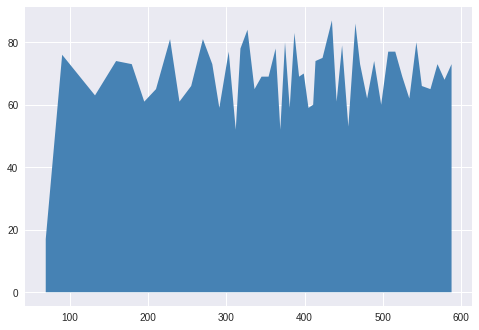

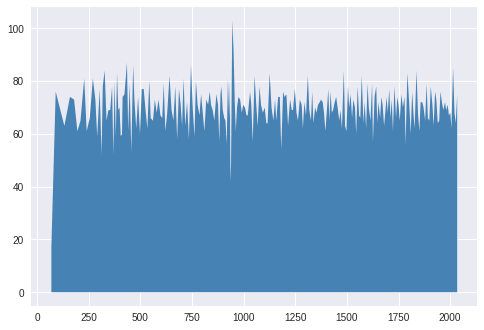

In [19]:
print(len(bin_edge_clength.repeat(2)[1:-1]))
print(len(hist_clength.repeat(2)))
# plot the histogram
#plt.fill_between(bin_edge_clength.repeat(2)[1:2000],hist_clength.repeat(2)[1:2000],facecolor='steelblue')
#plt.show()
# plot the first 100 bins only
plt.fill_between(bin_edge_clength.repeat(2)[1:100],hist_clength.repeat(2)[1:100],facecolor='steelblue')
plt.show()
# plot the first 500 bins only
plt.fill_between(bin_edge_clength.repeat(2)[1:500],hist_clength.repeat(2)[1:500],facecolor='steelblue')
plt.show()

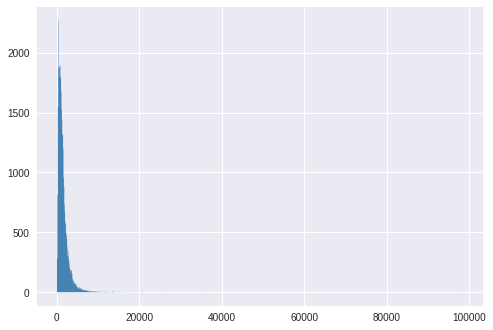

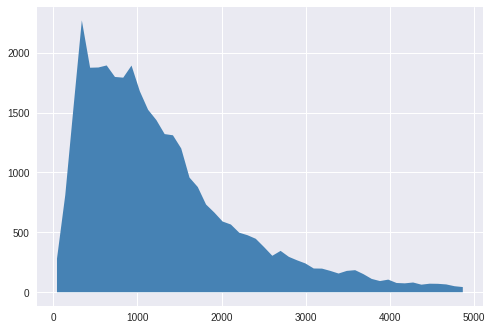

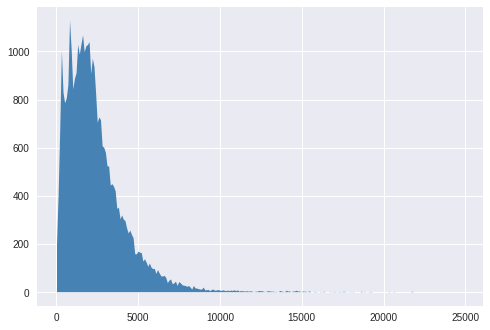

In [20]:
# cds_length
train_set_cds = data_all['cds_length']
# remove NaN values
train_set_cds_no_nan = train_set_cds[~np.isnan(train_set_cds)]
# bin the data into 1000 equally spaced bins
# hist is the count for each bin
# bin_edge is the edge values of the bins
hist_cds, bin_edge_cds = np.histogram(train_set_cds_no_nan,1000)
# make sure to import matplotlib.pyplot as plt
# plot the histogram
plt.fill_between(bin_edge_cds.repeat(2)[1:-1],hist_cds.repeat(2),facecolor='steelblue')
plt.show()
# plot the first 100 bins only
plt.fill_between(bin_edge_cds.repeat(2)[1:100],hist_cds.repeat(2)[1:100],facecolor='steelblue')
plt.show()
# plot the first 500 bins only
plt.fill_between(bin_edge.repeat(2)[1:500],hist.repeat(2)[1:500],facecolor='steelblue')
plt.show()

In [21]:
train_set_cds_no_nan_sorted = train_set_cds_no_nan.sort_values(ascending=False)
spacing = len(train_set_cds_no_nan) // 500 + 1 #1000 + 1
bin_edge_cds = train_set_cds_no_nan_sorted[0::spacing]
print(bin_edge_cds.shape)
bin_edge_cds = np.unique(bin_edge_cds)
print(bin_edge_cds.shape)
np.digitize(train_set_cds_no_nan, bin_edge_cds)
hist_cds = np.bincount(np.digitize(train_set_cds_no_nan, bin_edge_cds))

(496,)
(491,)


980
984


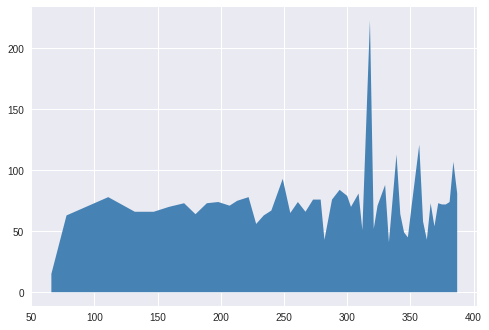

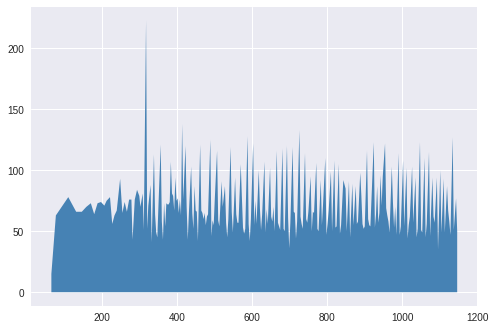

In [22]:
print(len(bin_edge_cds.repeat(2)[1:-1]))
print(len(hist_cds.repeat(2)))
# plot the histogram
#plt.fill_between(bin_edge_cds.repeat(2)[1:1500],hist_cds.repeat(2)[1:1500],facecolor='steelblue')
#plt.show()
# plot the first 100 bins only
plt.fill_between(bin_edge_cds.repeat(2)[1:100],hist_cds.repeat(2)[1:100],facecolor='steelblue')
plt.show()
# plot the first 500 bins only
plt.fill_between(bin_edge_cds.repeat(2)[1:500],hist_cds.repeat(2)[1:500],facecolor='steelblue')
plt.show()

In [23]:
np.max(np.digitize(train_set_cds_no_nan, bin_edge_clength))

502

## ทำการ digitalize ข้อมูล

In [24]:
train_set['cDNA_length_bin'] = np.digitize(train_set['cDNA_length'], bin_edge_clength)
train_set['cds_length_bin'] = np.digitize(train_set['cds_length'], bin_edge_cds)
train_set.head()

,cDNA_length,cds_length,exons_nr,5_MAR_presence,3_MAR_presence,5_polyA_18_presence,5_CCGNN_2_5_presence,perc_go_hk_match,perc_go_ts_match,is_hk,cDNA_length_bin,cds_length_bin
0,2918.0,1158.0,3.0,0,0,0,1,0.1,0.200000,NaN,355,252
1,4795.0,3540.0,29.0,0,0,0,1,0.1,0.200000,NaN,457,459
2,2918.0,1158.0,3.0,0,0,0,1,0.1,0.200000,NaN,355,252
3,4795.0,3540.0,29.0,0,0,0,1,0.1,0.200000,NaN,457,459
4,4551.0,1656.0,18.0,0,1,0,0,0.0,0.111111,NaN,448,346


In [25]:
likelihood = {}
bin_edges = {}
bin_edges['cDNA_length_bin_edge'] = bin_edge_clength
bin_edges['cds_length_bin_edge'] = bin_edge_cds
#likelihood['cDNA_length'] = 
print (sup_train_set.count())
print(len(np.digitize(sup_train_set['cDNA_length'], bin_edge_clength)) )
sup_train_set['cDNA_length_bin'] = np.digitize(sup_train_set['cDNA_length'], bin_edge_clength)
sup_train_set['cds_length_bin'] = np.digitize(sup_train_set['cds_length'], bin_edge_cds)
print (sup_train_set.count())
sup_train_set.head()

cDNA_length             693
cds_length              693
exons_nr                193
5_MAR_presence          693
3_MAR_presence          693
5_polyA_18_presence     693
5_CCGNN_2_5_presence    693
perc_go_hk_match        683
perc_go_ts_match        683
is_hk                   693
dtype: int64
693
cDNA_length             693
cds_length              693
exons_nr                193
5_MAR_presence          693
3_MAR_presence          693
5_polyA_18_presence     693
5_CCGNN_2_5_presence    693
perc_go_hk_match        683
perc_go_ts_match        683
is_hk                   693
cDNA_length_bin         693
cds_length_bin          693
dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,cDNA_length,cds_length,exons_nr,5_MAR_presence,3_MAR_presence,5_polyA_18_presence,5_CCGNN_2_5_presence,perc_go_hk_match,perc_go_ts_match,is_hk,cDNA_length_bin,cds_length_bin
91,3845.0,786.0,NaN,0,0,0,0,0.333333,0.0,1,419,159
92,960.0,960.0,NaN,0,0,0,0,0.333333,0.0,1,99,204
218,4019.0,3861.0,NaN,0,0,0,1,0.000000,0.5,0,427,467
219,3699.0,3699.0,NaN,0,0,0,1,0.000000,0.5,0,411,464
220,3847.0,3840.0,NaN,0,0,0,1,0.000000,0.5,0,419,466


## split class เพื่อแยกค่าเป็น 2 กลุ่ม ทำ

In [61]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
feature = list(sup_train_set.columns.values)
feature.remove('cDNA_length')
feature.remove('cds_length')
feature.remove('is_hk')
#model.fit(x_f1, label)
X_sp_train = np.array(sup_train_set[feature].values,dtype = int)
y_sp_train = np.array(sup_train_set['is_hk'].values,dtype = int)

'''
import numpy as np
y = np.array([1, 2, 3, 4, 5, 6])
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_sp_train, y_sp_train)
'''

# print(clf.predict(X[2:3]))

#display(model)
#display(sup_train_set.head())
#display(sup_train_set['perc_go_hk_match'].value_counts(dropna=False))
#display(sup_train_set['exons_nr'].value_counts(dropna=False))
#display(sup_train_set['cDNA_length_bin'].value_counts())
#display(sup_train_set['cds_length_bin'].value_counts())
#display(feature)
#display(X_sp_train)
#display(y_sp_train)

ValueError: ignored

In [0]:
sup_train_set_0 = sup_train_set[sup_train_set['is_hk']==0]
sup_train_set_1 = sup_train_set[sup_train_set['is_hk']==1]

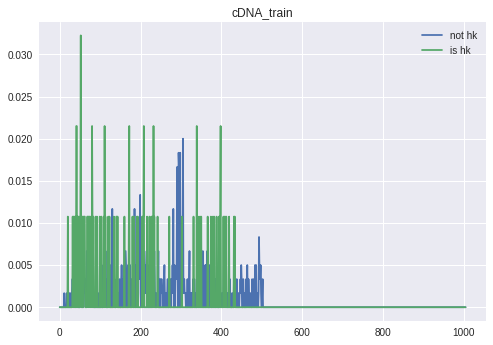

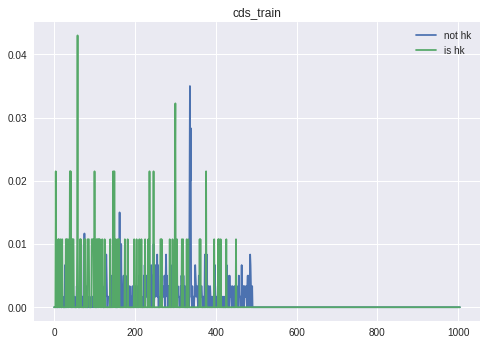

In [28]:
hist_cDNA_train_0 = np.bincount(sup_train_set_0['cDNA_length_bin'], minlength=1005)
hist_cDNA_train_1 = np.bincount(sup_train_set_1['cDNA_length_bin'], minlength=1005)
hist_cds_train_0 = np.bincount(sup_train_set_0['cds_length_bin'], minlength=1005)
hist_cds_train_1 = np.bincount(sup_train_set_1['cds_length_bin'], minlength=1005)

plt.title('cDNA_train')
plt.plot(hist_cDNA_train_0/np.sum(hist_cDNA_train_0), label='not hk')# ,color='steelblue')
plt.plot(hist_cDNA_train_1/np.sum(hist_cDNA_train_1), label='is hk')
plt.legend(loc='upper right')
#plt.plot(hist_cds_train/np.sum(hist_cds_train))
plt.show()

plt.title('cds_train')
plt.plot(hist_cds_train_0/np.sum(hist_cds_train_0), label='not hk')
plt.plot(hist_cds_train_1/np.sum(hist_cds_train_1), label='is hk')
plt.legend(loc='upper right')
plt.show()

In [0]:
def cal_likelihood_from_hist(hist):
  tmp_likelihood = pd.DataFrame(hist/np.sum(hist))
  tmp_likelihood.loc[tmp_likelihood[0] == 0] = 5e-4/np.sum(hist)
  #plt.plot(tmp_likelihood)
  # plt.show()
  return tmp_likelihood.to_dict()[0]

likelihood['cDNA_length_0'] = cal_likelihood_from_hist(hist_cDNA_train_0)
likelihood['cDNA_length_1'] = cal_likelihood_from_hist(hist_cDNA_train_1)
likelihood['cds_length_0'] = cal_likelihood_from_hist(hist_cds_train_0)
likelihood['cds_length_1'] = cal_likelihood_from_hist(hist_cds_train_1)

In [30]:
def cal_likelihood_bin(data, bin_count,ran=None):
  #print(data)
  data = data[~np.isnan(data)]
  if ran is None:
    hist, bin_edge = np.histogram(data,bin_count)
  else:
    hist, bin_edge = np.histogram(data,bin_count,range=ran)
  #plt.plot(hist)
  #plt.show()
  #print(hist)
  #print(cal_likelihood_from_hist(hist))
  return cal_likelihood_from_hist(hist)
  
likelihood['exons_nr_0'] = cal_likelihood_bin(sup_train_set_0['exons_nr'],119, [0,118])
likelihood['exons_nr_1'] = cal_likelihood_bin(sup_train_set_1['exons_nr'],119, [0,118])
likelihood['5_MAR_presence_0'] = cal_likelihood_bin(sup_train_set_0['5_MAR_presence'].astype(int),2)
likelihood['5_MAR_presence_1'] = cal_likelihood_bin(sup_train_set_1['5_MAR_presence'].astype(int),2)
likelihood['3_MAR_presence_0'] = cal_likelihood_bin(sup_train_set_0['3_MAR_presence'].astype(int),2)
likelihood['3_MAR_presence_1'] = cal_likelihood_bin(sup_train_set_1['3_MAR_presence'].astype(int),2)
likelihood['5_polyA_18_presence_0'] = cal_likelihood_bin(sup_train_set_0['5_polyA_18_presence'].astype(int),2)
likelihood['5_polyA_18_presence_1'] = cal_likelihood_bin(sup_train_set_1['5_polyA_18_presence'].astype(int),2)
likelihood['5_CCGNN_2_5_presence_0'] = cal_likelihood_bin(sup_train_set_0['5_CCGNN_2_5_presence'].astype(int),2)
likelihood['5_CCGNN_2_5_presence_1'] = cal_likelihood_bin(sup_train_set_1['5_CCGNN_2_5_presence'].astype(int),2)
likelihood['perc_go_hk_match_0'] = cal_likelihood_bin(sup_train_set_0['perc_go_hk_match'],101, [0,100])
likelihood['perc_go_hk_match_1'] = cal_likelihood_bin(sup_train_set_1['perc_go_hk_match'],101, [0,100])
likelihood['perc_go_ts_match_0'] = cal_likelihood_bin(sup_train_set_0['perc_go_ts_match'],101, [0,100])
likelihood['perc_go_ts_match_1'] = cal_likelihood_bin(sup_train_set_1['perc_go_ts_match'],101, [0,100])
#plt.title('perc_go_hk_match')
#plt.show()
print(likelihood.keys(), len(likelihood.keys()))


dict_keys(['cDNA_length_0', 'cDNA_length_1', 'cds_length_0', 'cds_length_1', 'exons_nr_0', 'exons_nr_1', '5_MAR_presence_0', '5_MAR_presence_1', '3_MAR_presence_0', '3_MAR_presence_1', '5_polyA_18_presence_0', '5_polyA_18_presence_1', '5_CCGNN_2_5_presence_0', '5_CCGNN_2_5_presence_1', 'perc_go_hk_match_0', 'perc_go_hk_match_1', 'perc_go_ts_match_0', 'perc_go_ts_match_1']) 18


In [31]:
test_set['cDNA_length_bin'] = np.digitize(test_set['cDNA_length'], bin_edge_clength)
test_set['cds_length_bin'] = np.digitize(test_set['cds_length'], bin_edge_cds)

test_set['perc_go_hk_match_bin'] = (test_set['perc_go_hk_match']*100).astype(int)
test_set['perc_go_ts_match_bin'] = (test_set['perc_go_ts_match']*100).astype(int)
test_set 

,cDNA_length,cds_length,exons_nr,5_MAR_presence,3_MAR_presence,5_polyA_18_presence,5_CCGNN_2_5_presence,perc_go_hk_match,perc_go_ts_match,is_hk,cDNA_length_bin,cds_length_bin,perc_go_hk_match_bin,perc_go_ts_match_bin
9977,1878.0,1248.0,NaN,0,0,0,0,0.000000,0.333333,0,226,271,0,33
22035,2327.0,1587.0,NaN,0,1,0,0,0.000000,0.636364,0,290,335,0,63
31699,1239.0,1239.0,NaN,0,0,0,0,0.000000,0.600000,0,135,269,0,60
30881,1618.0,678.0,6.0,0,0,0,1,0.000000,0.461539,0,188,130,0,46
19125,1167.0,855.0,10.0,0,0,0,1,0.000000,0.250000,0,126,175,0,25
15237,913.0,810.0,NaN,0,0,0,0,0.000000,0.800000,0,90,165,0,80
12901,4254.0,2523.0,17.0,0,0,0,0,0.000000,0.222222,0,437,423,0,22
22011,2327.0,1587.0,NaN,0,1,0,0,0.000000,0.636364,0,290,335,0,63
2038,3690.0,1800.0,NaN,0,0,0,1,0.000000,0.666667,0,411,365,0,66
21706,3360.0,2022.0,17.0,0,0,0,0,0.000000,0.333333,0,389,387,0,33


In [0]:
cols = ['cDNA_length_bin','cds_length_bin','exons_nr','5_MAR_presence',
        '3_MAR_presence','5_polyA_18_presence','5_CCGNN_2_5_presence','perc_go_hk_match_bin',
        'perc_go_ts_match_bin']
#test_set.values
#(test_set['is_hk'] == 1).count()
# test_np = test_set.values
test_x = test_set[cols].values
test_y = test_set['is_hk'].values
prior_0 = 0.865801
prior_1 = 0.134199

In [0]:
# test_y.shape
likelihood_name = ['cDNA_length','cds_length','exons_nr','5_MAR_presence',
                   '3_MAR_presence','5_polyA_18_presence','5_CCGNN_2_5_presence','perc_go_hk_match',
                   'perc_go_ts_match']

In [0]:
def predict(x, lname, threshold=0):
  # print(x)
  sc = np.log(prior_1) - np.log(prior_0)
  for i,feat in enumerate(x):
    if not np.isnan(feat):
      feat = int(feat)
      sc += np.log(likelihood[lname[i]+'_1'][feat]) - np.log(likelihood[lname[i]+'_0'][feat])
  # print(sc)
  return int(sc > threshold), sc

In [35]:
pred = np.zeros(test_y.shape)
score = np.zeros(test_y.shape)
for i, x in enumerate(test_x):
  pred[i], score[i] = predict(x,likelihood_name)
  # print(pred[i], test_y[i])

def cal_accuracy(pred, test, verbose=False):
  acc = np.mean(pred == test)
  
  tp = np.sum((pred == test) & (test == 1.0))
  tn = np.sum((pred == test) & (test == 0.0))
  fp = np.sum((pred != test) & (pred == 1.0))
  fn = np.sum((pred != test) & (pred == 0.0))

  precision = 1. * tp / (tp + fp)
  recall = 1. * tp / (tp + fn)
  fscore = 2. * precision * recall / (precision + recall)
  if verbose:
    print(tp,tn,fp,fn)
    print('Accuracy: ', acc)
    print('Precision: ', precision )
    print('Recall: ', recall )
    print('F-score: ', fscore)

  return acc, fscore, recall, 1. * fp / (fp + tn)

cal_accuracy(pred, test_y,True)

8 55 12 2
Accuracy:  0.8181818181818182
Precision:  0.4
Recall:  0.8
F-score:  0.5333333333333333


(0.8181818181818182, 0.5333333333333333, 0.8, 0.1791044776119403)

In [36]:
random_pred = np.random.randint(2, size=len(pred))
cal_accuracy(random_pred, test_y, True)

7 36 31 3
Accuracy:  0.5584415584415584
Precision:  0.18421052631578946
Recall:  0.7
F-score:  0.29166666666666663


(0.5584415584415584, 0.29166666666666663, 0.7, 0.4626865671641791)

In [37]:
zero_pred = np.zeros(len(pred))
cal_accuracy(zero_pred, test_y, True)

0 67 0 10
Accuracy:  0.8701298701298701
Precision:  nan
Recall:  0.0
F-score:  nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


(0.8701298701298701, nan, 0.0, 0.0)

0.372093023255814
0.4
0.4
0.4
0.4102564102564103
0.4102564102564103
0.4102564102564103
0.4102564102564103
0.4102564102564103
0.4102564102564103
0.4102564102564103
0.4102564102564103
0.4102564102564103
0.4102564102564103
0.4102564102564103
0.43243243243243246
0.43243243243243246
0.43243243243243246
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.45714285714285713
0.48484848484848486
0.48484848484848486
0.48484848484848486
0.48484848484848486
0.48484848484848486
0.48484848484848486
0.48484848484848486
0.48484848484848486
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5000000000000001
0.5161290322580645
0.5161290322580645
0.5161290322580645
0.5161290322580645
0.5161290322580645
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.5333333333333333
0.533333

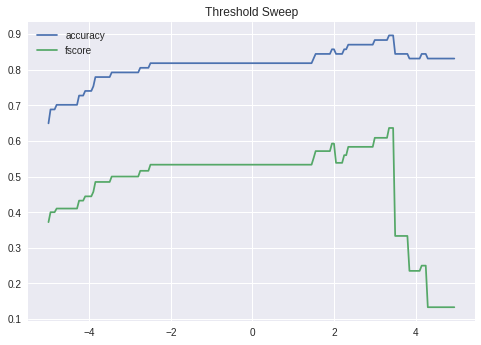

In [38]:
t = np.arange(-5,5,0.05)
accuracy_sweep = np.zeros_like(t)
fscore_sweep = np.zeros_like(t)
true_positive_rate = np.zeros_like(t)
false_positive_rate = np.zeros_like(t)

for idx, threshold in enumerate(t):
  pred_tmp = (score > threshold).astype(int)
  accuracy_sweep[idx], fscore_sweep[idx], \
    true_positive_rate[idx], false_positive_rate[idx] = cal_accuracy(pred_tmp, test_y)
  if np.isnan(fscore_sweep[idx]):
    fscore_sweep[idx] = 0
  print(fscore_sweep[idx])

plt.title('Threshold Sweep')
plt.plot(t,accuracy_sweep, label='accuracy')
plt.plot(t,fscore_sweep, label='fscore')
plt.legend()
plt.show()

In [39]:
#print(np.argmax(accuracy_sweep))
print(t[np.argmax(fscore_sweep)])
print(t[np.argmax(accuracy_sweep)])

3.3499999999999694
3.3499999999999694


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


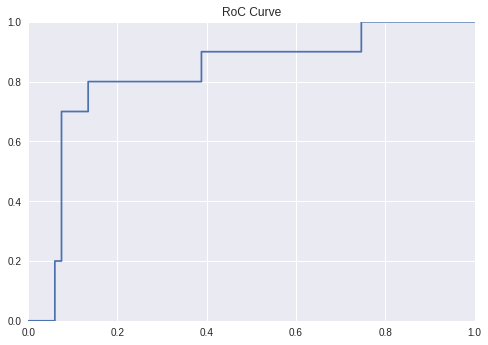

In [40]:
t = np.arange(-100,100,0.05)
accuracy_sweep = np.zeros_like(t)
fscore_sweep = np.zeros_like(t)
true_positive_rate = np.zeros_like(t)
false_positive_rate = np.zeros_like(t)

for idx, threshold in enumerate(t):
  pred_tmp = (score > threshold).astype(int)
  accuracy_sweep[idx], fscore_sweep[idx], \
    true_positive_rate[idx], false_positive_rate[idx] = cal_accuracy(pred_tmp, test_y)
  #if np.isnan(fscore_sweep[idx]):
  #  fscore_sweep[idx] = 0
  #print(fscore_sweep[idx])

#plt.title('Threshold Sweep')
#plt.plot(t,true_positive_rate, label='true_positive_rate')
#plt.plot(t,false_positive_rate, label='false_positive_rate')
#plt.legend()
#plt.show()

plt.title('RoC Curve')
plt.plot(false_positive_rate,true_positive_rate)
plt.axis([0, 1, 0, 1])
plt.show()

In [0]:
unsup_train_set['cDNA_length_bin'] = np.digitize(unsup_train_set['cDNA_length'], bin_edge_clength)
unsup_train_set['cds_length_bin'] = np.digitize(unsup_train_set['cds_length'], bin_edge_cds)

unsup_train_set['perc_go_hk_match_bin'] = (unsup_train_set['perc_go_hk_match']*100)
unsup_train_set['perc_go_ts_match_bin'] = (unsup_train_set['perc_go_ts_match']*100)
pred_index = unsup_train_set.index
unsup_x = unsup_train_set[cols].values

In [42]:
pred_unsup = np.zeros(pred_index.shape)
for i, x in enumerate(unsup_x):
  pred_unsup[i],_ = predict(x,likelihood_name,3.35)
  # print(pred_index[i], int(pred_unsup[i]))
pred_unsup = pred_unsup.astype(int)
np.sum(pred_unsup)

4074

In [0]:
with open('out.csv', 'w') as csvfile:
  outwriter = csv.writer(csvfile, delimiter=',')
  outwriter.writerow(['ID','is_hk'])
  for (idx,y) in zip(pred_index, pred_unsup):
    #print(idx, y)  
    outwriter.writerow([idx,y])

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])